In [1]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#!pip install hvplot

In [3]:
#import hvplot.pandas

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.linear_model import LinearRegression

%matplotlib inline

In [4]:
df = pd.read_csv('/kaggle/input/tesla-2015-2022/TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-16,311.666656,314.666656,302.883331,306.563324,306.563324,88136400
1,2022-08-17,303.396667,309.656677,300.033325,303.996674,303.996674,68766000
2,2022-08-18,306.000000,306.500000,301.853333,302.869995,302.869995,47500500
3,2022-08-19,299.000000,300.359985,292.500000,296.666656,296.666656,61395300
4,2022-08-22,291.913330,292.399994,286.296661,289.913330,289.913330,55843200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,211.045989,215.504488,206.107012,210.851315,210.851315,1.255037e+08
std,51.010268,51.316087,50.480754,50.795781,50.795781,4.876765e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,4.186470e+07
25%,176.635002,182.419998,172.504998,178.474998,178.474998,9.012940e+07
50%,198.539993,203.000000,192.889999,197.580002,197.580002,1.203321e+08
75%,255.035004,260.614990,250.919998,256.419998,256.419998,1.599710e+08
max,311.666656,314.666656,305.579987,309.070007,309.070007,3.065906e+08


In [7]:
df.value_counts('Open')

Open
194.419998    2
183.949997    2
103.000000    1
245.009995    1
226.039993    1
             ..
186.199997    1
186.320007    1
186.539993    1
186.690002    1
311.666656    1
Length: 249, dtype: int64

In [8]:
df.value_counts('High')

High
165.000000    2
186.500000    2
214.660004    2
198.600006    2
240.660004    1
             ..
190.679993    1
191.000000    1
191.270004    1
191.580002    1
314.666656    1
Length: 247, dtype: int64

In [9]:
df.value_counts('Low')

Low
189.440002    2
180.630005    2
101.809998    1
218.360001    1
221.940002    1
             ..
180.940002    1
182.009995    1
182.589996    1
182.610001    1
305.579987    1
Length: 249, dtype: int64

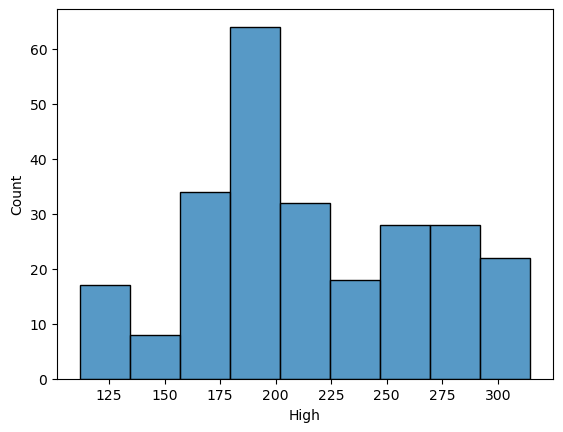

In [10]:
sns.histplot(df, x ='High')
plt.show()

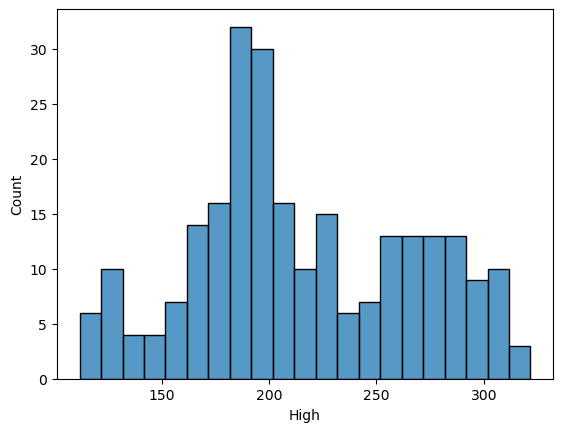

In [11]:
sns.histplot(df, x ='High', binwidth = 10)
plt.show()

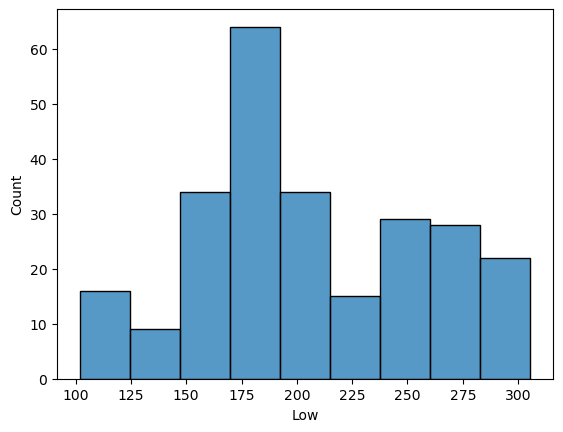

In [12]:
sns.histplot(df, x ='Low')
plt.show()

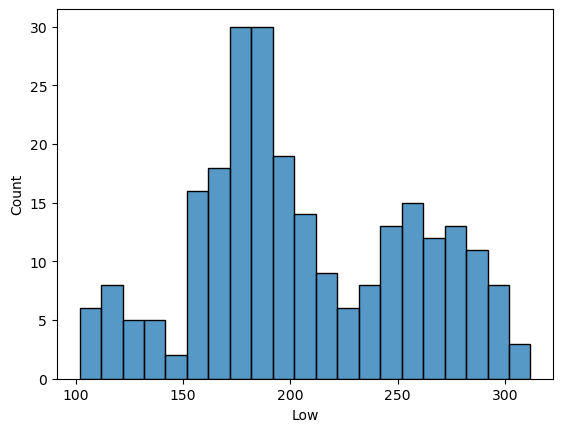

In [13]:
sns.histplot(df, x='Low', binwidth = 10)
plt.show()

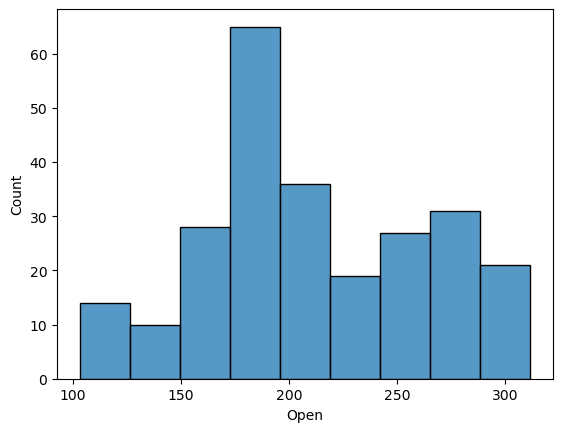

In [14]:
sns.histplot(df, x ='Open')
plt.show()

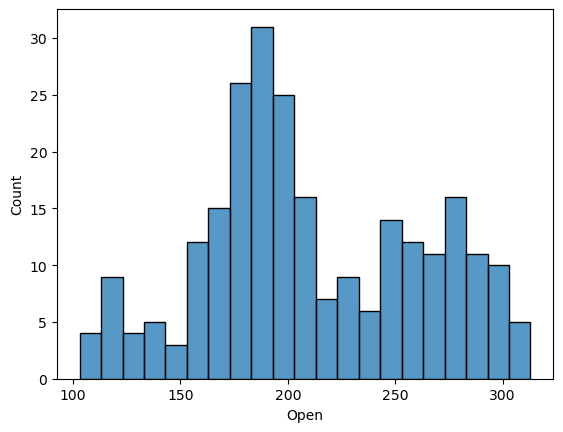

In [15]:
sns.histplot(df, x='Open', binwidth = 10)
plt.show()

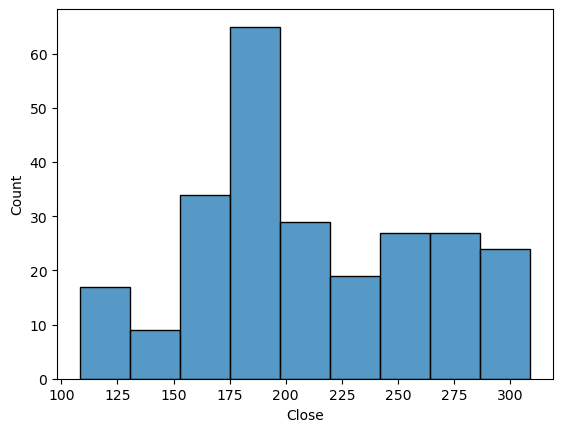

In [16]:
sns.histplot(df, x ='Close')
plt.show()

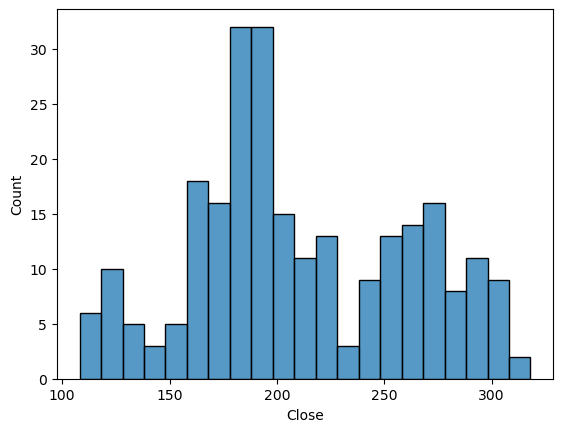

In [17]:
sns.histplot(df, x='Close', binwidth = 10)
plt.show()

In [18]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [19]:
df['Open'] = df['Open'].astype(int)
df['Low'] = df['Low'].astype(int)
df['Close'] = df['Close'].astype(int)
df['Adj Close'] = df['Adj Close'].astype(int)
df['Volume'] = df['Volume'].astype(int)

In [20]:
df.dtypes

Date          object
Open           int64
High         float64
Low            int64
Close          int64
Adj Close      int64
Volume         int64
dtype: object

In [21]:
df['Open'].isin(['High', 'Low'])

0      False
1      False
2      False
3      False
4      False
       ...  
246    False
247    False
248    False
249    False
250    False
Name: Open, Length: 251, dtype: bool

In [22]:
df['Close'].isin(['High', 'Low'])

0      False
1      False
2      False
3      False
4      False
       ...  
246    False
247    False
248    False
249    False
250    False
Name: Close, Length: 251, dtype: bool

In [23]:
df['Open'].max()

311

In [24]:
df['Open'].min()

103

In [25]:
df['Close'].max()

309

In [26]:
df['Close'].min()

108

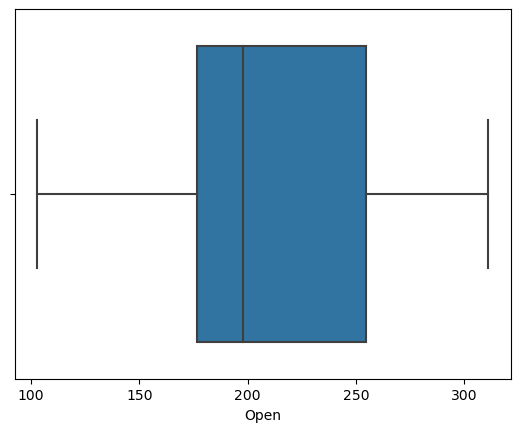

In [27]:
sns.boxplot(df, x='Open')
plt.show()

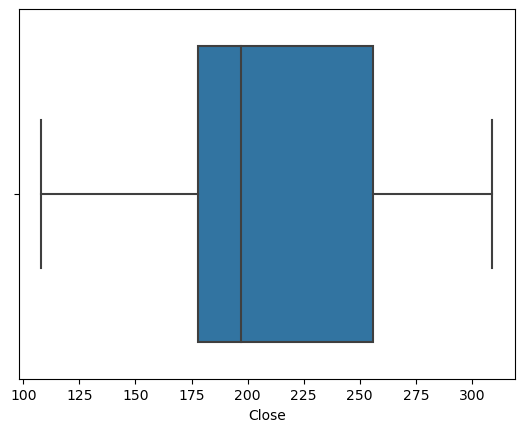

In [28]:
sns.boxplot(df, x='Close')
plt.show()

In [29]:
df.groupby('Volume').mean()

/tmp/ipykernel_20/905763239.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Volume').mean()


,Open,High,Low,Close,Adj Close
Volume,,,,,
41864700,282.0,287.739990,280.0,284.0,284.0
47500500,306.0,306.500000,301.0,302.0,302.0
48674600,300.0,305.489990,300.0,304.0,304.0
50028900,273.0,283.839996,272.0,283.0,283.0
50541800,287.0,288.480011,272.0,277.0,277.0
...,...,...,...,...,...
230878800,178.0,179.770004,166.0,166.0,166.0
231402800,118.0,118.800003,104.0,108.0,108.0
232662000,183.0,199.000000,183.0,189.0,189.0


In [30]:
df.groupby('Volume').sum()

/tmp/ipykernel_20/2788033558.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Volume').sum()


,Open,High,Low,Close,Adj Close
Volume,,,,,
41864700,282,287.739990,280,284,284
47500500,306,306.500000,301,302,302
48674600,300,305.489990,300,304,304
50028900,273,283.839996,272,283,283
50541800,287,288.480011,272,277,277
...,...,...,...,...,...
230878800,178,179.770004,166,166,166
231402800,118,118.800003,104,108,108
232662000,183,199.000000,183,189,189


In [31]:
df.groupby('Volume').count()

,Date,Open,High,Low,Close,Adj Close
Volume,,,,,,
41864700,1,1,1,1,1,1
47500500,1,1,1,1,1,1
48674600,1,1,1,1,1,1
50028900,1,1,1,1,1,1
50541800,1,1,1,1,1,1
...,...,...,...,...,...,...
230878800,1,1,1,1,1,1
231402800,1,1,1,1,1,1
232662000,1,1,1,1,1,1


In [32]:
df.groupby('Volume').min()

,Date,Open,High,Low,Close,Adj Close
Volume,,,,,,
41864700,2022-08-29,282,287.739990,280,284,284
47500500,2022-08-18,306,306.500000,301,302,302
48674600,2022-09-12,300,305.489990,300,304,304
50028900,2022-09-07,273,283.839996,272,283,283
50541800,2022-08-30,287,288.480011,272,277,277
...,...,...,...,...,...,...
230878800,2023-01-30,178,179.770004,166,166,166
231402800,2023-01-03,118,118.800003,104,108,108
232662000,2023-02-03,183,199.000000,183,189,189


In [33]:
df.groupby('Volume').max()

,Date,Open,High,Low,Close,Adj Close
Volume,,,,,,
41864700,2022-08-29,282,287.739990,280,284,284
47500500,2022-08-18,306,306.500000,301,302,302
48674600,2022-09-12,300,305.489990,300,304,304
50028900,2022-09-07,273,283.839996,272,283,283
50541800,2022-08-30,287,288.480011,272,277,277
...,...,...,...,...,...,...
230878800,2023-01-30,178,179.770004,166,166,166
231402800,2023-01-03,118,118.800003,104,108,108
232662000,2023-02-03,183,199.000000,183,189,189


In [34]:
df.groupby('Volume').var()

/tmp/ipykernel_20/3969879603.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Volume').var()


,Open,High,Low,Close,Adj Close
Volume,,,,,
41864700,NaN,NaN,NaN,NaN,NaN
47500500,NaN,NaN,NaN,NaN,NaN
48674600,NaN,NaN,NaN,NaN,NaN
50028900,NaN,NaN,NaN,NaN,NaN
50541800,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
230878800,NaN,NaN,NaN,NaN,NaN
231402800,NaN,NaN,NaN,NaN,NaN
232662000,NaN,NaN,NaN,NaN,NaN


In [35]:
df.groupby('Volume').std()

/tmp/ipykernel_20/3125541632.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Volume').std()


,Open,High,Low,Close,Adj Close
Volume,,,,,
41864700,NaN,NaN,NaN,NaN,NaN
47500500,NaN,NaN,NaN,NaN,NaN
48674600,NaN,NaN,NaN,NaN,NaN
50028900,NaN,NaN,NaN,NaN,NaN
50541800,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
230878800,NaN,NaN,NaN,NaN,NaN
231402800,NaN,NaN,NaN,NaN,NaN
232662000,NaN,NaN,NaN,NaN,NaN


In [36]:
df.agg(['mean','count', 'min', 'max', 'var', 'std', 'median'])

/tmp/ipykernel_20/2421852508.py:1: FutureWarning: ['Date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.agg(['mean','count', 'min', 'max', 'var', 'std', 'median'])


,Date,Open,High,Low,Close,Adj Close,Volume
mean,NaN,210.569721,215.504488,205.649402,210.338645,210.338645,1.255037e+08
count,251,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
min,2022-08-16,103.000000,111.750000,101.000000,108.000000,108.000000,4.186470e+07
max,2023-08-15,311.000000,314.666656,305.000000,309.000000,309.000000,3.065906e+08
var,NaN,2602.326120,2633.340785,2546.676590,2580.376861,2580.376861,2.378284e+15
std,NaN,51.013000,51.316087,50.464607,50.797410,50.797410,4.876765e+07
median,NaN,198.000000,203.000000,192.000000,197.000000,197.000000,1.203321e+08


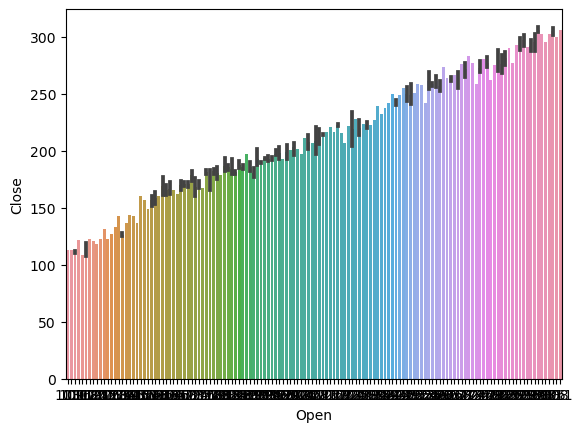

In [37]:
sns.barplot(df, x='Open', y='Close')
plt.show()

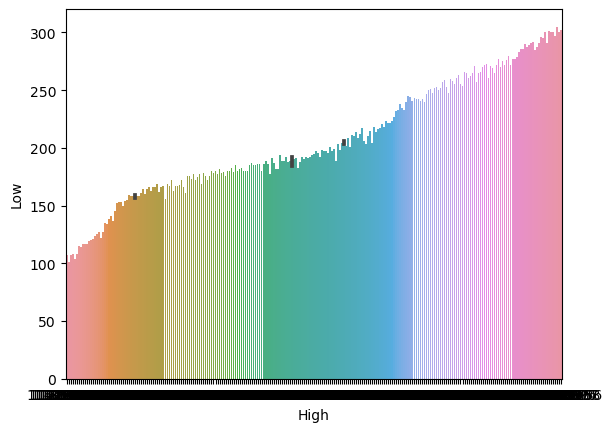

In [38]:
sns.barplot(df, x='High', y='Low')
plt.show()

/tmp/ipykernel_20/1090346717.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,cmap='Reds')


<Axes: >

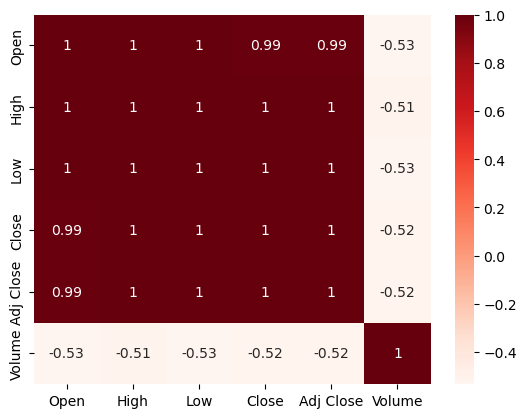

In [39]:
sns.heatmap(df.corr(), annot=True,cmap='Reds')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


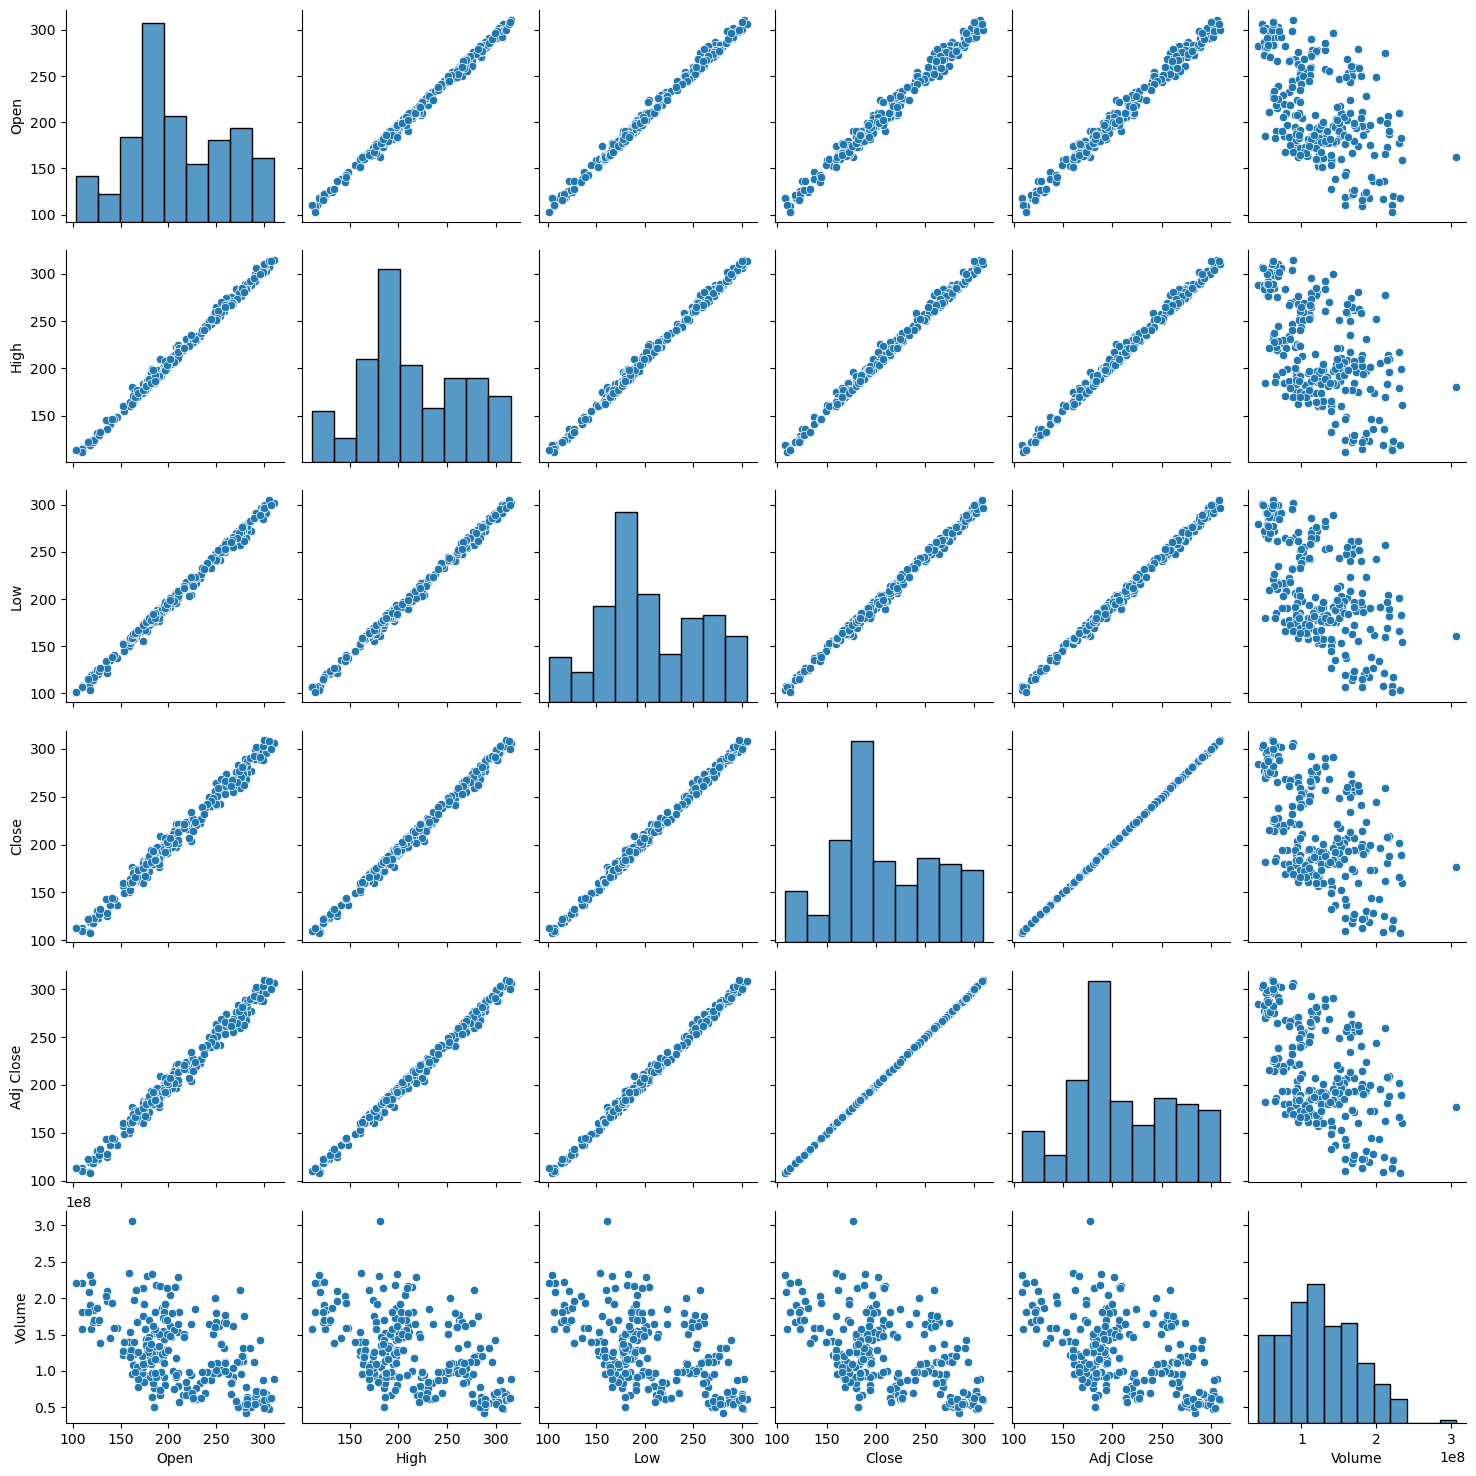

In [40]:
sns.pairplot(df)